#Detection and Monitoring of Buried Plastic in Sandy Environments Using Deep Learning and Computer Vision

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Loading Datasets
**Step 1:** Data Collection and Annotation

In [ ]:
!unzip "/content/drive/MyDrive/Mini_Project/Garbage Detection.v1i.darknet.zip" -d "/content/Trash Data/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/Trash Data/train/ManilaBay_a4daa90_jpg.rf.9ef53f6a407ee3f396acc29a4bffbf39.txt  
 extracting: /content/Trash Data/train/ManilaBay_a4df85ed70_jpg.rf.1ed8478bae4cde6ab94e41b9bc519b31.jpg  
  inflating: /content/Trash Data/train/ManilaBay_a4df85ed70_jpg.rf.1ed8478bae4cde6ab94e41b9bc519b31.txt  
 extracting: /content/Trash Data/train/ManilaBay_a4df85ed70_jpg.rf.8d74cdab7c7733fc5e0658dc856e130f.jpg  
  inflating: /content/Trash Data/train/ManilaBay_a4df85ed70_jpg.rf.8d74cdab7c7733fc5e0658dc856e130f.txt  
 extracting: /content/Trash Data/train/ManilaBay_a4df85ed70_jpg.rf.bd5455a6f787f195de4da6c0d83689b7.jpg  
  inflating: /content/Trash Data/train/ManilaBay_a4df85ed70_jpg.rf.bd5455a6f787f195de4da6c0d83689b7.txt  
 extracting: /content/Trash Data/train/ManilaBay_a4e6bd0240_jpg.rf.2049cb2c5353025bea2241423d766158.jpg  
  inflating: /content/Trash Data/train/ManilaBay_a4e6bd0240_jpg.rf.2049cb2c5353025bea2241423d766158.txt 

In [ ]:
!unzip "/content/drive/MyDrive/Mini_Project/archive.zip" -d "/content/Aqua Trash/"

Archive:  /content/drive/MyDrive/Mini_Project/archive.zip
  inflating: /content/Aqua Trash/Images/000000_JPG.rf.d3371cb3d63a59c5ba6730368b7905af.jpg  
  inflating: /content/Aqua Trash/Images/000000_jpg.rf.beffaf3b548106ccf1da5dc629bc9504.jpg  
  inflating: /content/Aqua Trash/Images/000000_jpg.rf.e662cb85f63817325956fea222d0990f.jpg  
  inflating: /content/Aqua Trash/Images/000000_jpg.rf.ee75fdf06813399a8376c6ff7056423a.jpg  
  inflating: /content/Aqua Trash/Images/000001_JPG.rf.ccfdd243a78a6cfa119be0349d18c0ed.jpg  
  inflating: /content/Aqua Trash/Images/000001_jpg.rf.3b10b06a0479e6c9e52202033c95d203.jpg  
  inflating: /content/Aqua Trash/Images/000001_jpg.rf.42c4ba88119aae9d425f5c004cb2ce0d.jpg  
  inflating: /content/Aqua Trash/Images/000001_jpg.rf.a23b83dbda863601c92725ae9ba3bab7.jpg  
  inflating: /content/Aqua Trash/Images/000002_jpg.rf.ba12a4ce95a3dd81818a5e373efe28be.jpg  
  inflating: /content/Aqua Trash/Images/000002_jpg.rf.cc63f3f198e4bafa011b425d63252066.jpg  
  inflating:

In [ ]:
!unzip "/content/drive/MyDrive/Mini_Project/Garbage Detection.v1i.yolov8.zip" -d "/content/Trash Data yolo/"

Streaming output truncated to the last 5000 lines.
 extracting: /content/Trash Data yolo/train/labels/ManilaBay_455b12b36b_jpg.rf.2fe3a3cd5bc1584f2a0ba29a008173ea.txt  
 extracting: /content/Trash Data yolo/train/labels/ManilaBay_455b12b36b_jpg.rf.389265263489ae367b84f66abe6ec684.txt  
 extracting: /content/Trash Data yolo/train/labels/ManilaBay_455b12b36b_jpg.rf.ab66a4f25a376df76ca39ddd7a67f503.txt  
 extracting: /content/Trash Data yolo/train/labels/ManilaBay_455eccc_jpg.rf.1f2a1cbd749ab36a64f76a53282f3ceb.txt  
 extracting: /content/Trash Data yolo/train/labels/ManilaBay_455eccc_jpg.rf.4ef41ca19fdf1fb3a320f33dedd1e579.txt  
 extracting: /content/Trash Data yolo/train/labels/ManilaBay_455eccc_jpg.rf.6c6b32acb9446230cb76332a9f345baa.txt  
 extracting: /content/Trash Data yolo/train/labels/ManilaBay_45d1ca1_jpg.rf.3baee7dfd3e51bf399b23f8a6df5ac6f.txt  
 extracting: /content/Trash Data yolo/train/labels/ManilaBay_45d1ca1_jpg.rf.8d025405a05151620bd1df25578eb9bc.txt  
 extracting: /conten

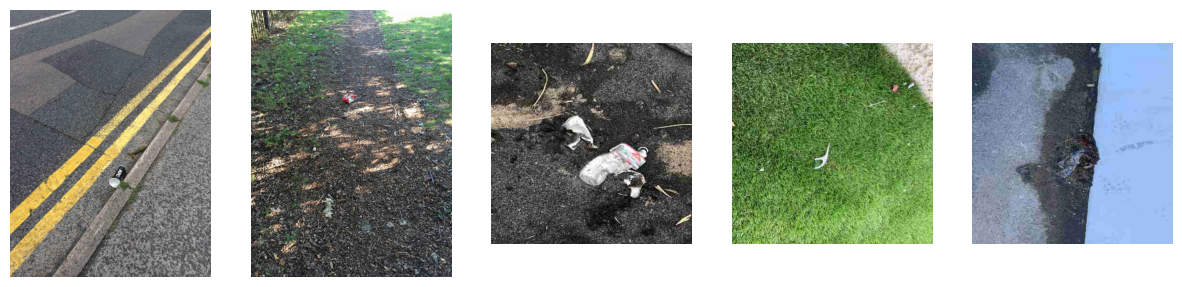

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the folder containing the images
image_folder = '/content/Aqua Trash/Images'

all_files = os.listdir(image_folder)
image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif']
image_files = [f for f in all_files if os.path.splitext(f)[1].lower() in image_extensions]

selected_images = random.sample(image_files, min(5, len(image_files)))

fig, axes = plt.subplots(1, len(selected_images), figsize=(15, 5))
if len(selected_images) == 1:
    axes = [axes]

for ax, img_file in zip(axes, selected_images):
    img_path = os.path.join(image_folder, img_file)
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')

plt.show()

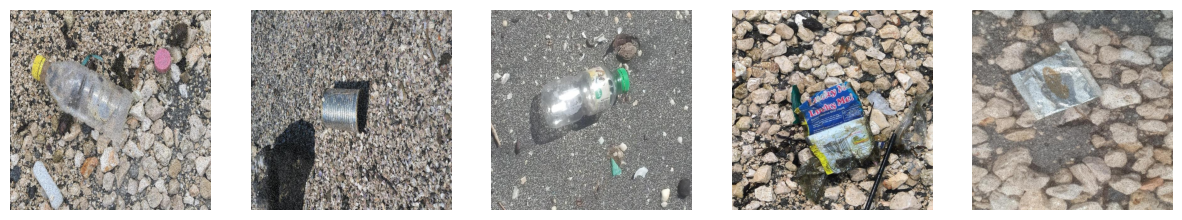

In [ ]:
# Define the folder containing the images
image_folder = '/content/Trash Data/train'

all_files = os.listdir(image_folder)
image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif']
image_files = [f for f in all_files if os.path.splitext(f)[1].lower() in image_extensions]

selected_images = random.sample(image_files, min(5, len(image_files)))

fig, axes = plt.subplots(1, len(selected_images), figsize=(15, 5))
if len(selected_images) == 1:
    axes = [axes]

for ax, img_file in zip(axes, selected_images):
    img_path = os.path.join(image_folder, img_file)
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')

plt.show()

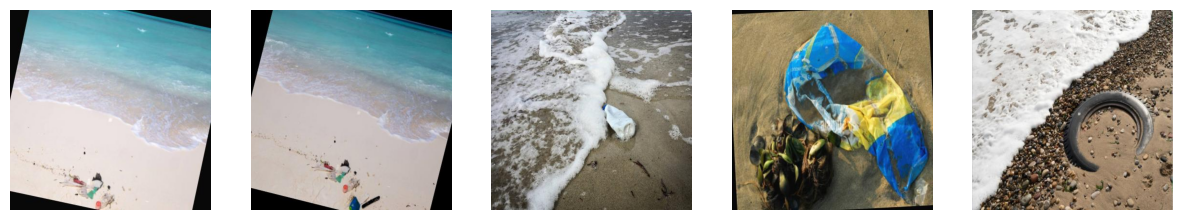

In [ ]:
# Annoted Dataset

# Define the folder containing the images
image_folder = '/content/drive/MyDrive/Mini_Project/labelled alamy/train/images'

all_files = os.listdir(image_folder)
image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif']
image_files = [f for f in all_files if os.path.splitext(f)[1].lower() in image_extensions]

selected_images = random.sample(image_files, min(5, len(image_files)))

fig, axes = plt.subplots(1, len(selected_images), figsize=(15, 5))
if len(selected_images) == 1:
    axes = [axes]

for ax, img_file in zip(axes, selected_images):
    img_path = os.path.join(image_folder, img_file)
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')

plt.show()

##Model Training
**Step 2 :** Model Building for classification of Trashes\
YOLO Model for Object Detection

In [ ]:
# Clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5
!cd yolov5

# Install dependencies
!pip install -r requirements.txt

import os
import pandas as pd

# Path to the CSV and images folder
csv_file = '/content/Aqua Trash/annotations.csv'
image_folder = '/content/Aqua Trash/Images'
output_label_folder = '/content/Aqua Trash/Labels'

# Create output folder if not exists
os.makedirs(output_label_folder, exist_ok=True)

# Load the CSV file
df = pd.read_csv(csv_file)

# Normalize the coordinates (YOLO format requires this)
def convert_to_yolo_format(row, img_width, img_height):
    x_min, y_min, x_max, y_max = row['x_min'], row['y_min'], row['x_max'], row['y_max']
    x_center = (x_min + x_max) / 2.0 / img_width
    y_center = (y_min + y_max) / 2.0 / img_height
    width = (x_max - x_min) / img_width
    height = (y_max - y_min) / img_height
    return x_center, y_center, width, height

# Loop through images and create corresponding YOLO label files
for img_file in df['image_name'].unique():
    img_path = os.path.join(image_folder, img_file)
    img = mpimg.imread(img_path)
    img_height, img_width = img.shape[:2]

    # Filter annotations for this image
    img_annotations = df[df['image_name'] == img_file]

    # Create label file for each image
    label_file = os.path.join(output_label_folder, os.path.splitext(img_file)[0] + '.txt')
    with open(label_file, 'w') as f:
        for _, row in img_annotations.iterrows():
            x_center, y_center, width, height = convert_to_yolo_format(row, img_width, img_height)
            class_id = ['plastic', 'metal', 'glass'].index(row['class_name'])  # Assign class ids
            f.write(f"{class_id} {x_center} {y_center} {width} {height}\n")


"""
train: /content/Aqua Trash/Images/train  # Path to training images
val: /content/Aqua Trash/Images/val      # Path to validation images

# Number of classes
nc: 3  # number of unique classes

# Class names
names: ['plastic', 'metal', 'glass']
""""

!python train.py --img 640 --batch 16 --epochs 50 --data /content/Aqua Trash/data.yaml --weights yolov5s.pt

SyntaxError: unterminated string literal (detected at line 58) (<ipython-input-8-c6e2fa69291e>, line 58)

In [ ]:
!git clone https://github.com/pjreddie/darknet.git

In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights

In [ ]:
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the folder containing the images
image_folder = '/content/drive/MyDrive/Mini_Project/labelled alamy/train/images'

# Load YOLOv3 configuration and weights
config_path = '/content/darknet/cfg/yolov3.cfg'  # Update with your configuration path
weights_path = '/content/yolov3.weights'  # Update with your weights path
labels_path = '/content/darknet/data/coco.names'  # Update with your labels path or use your custom labels

# Load the YOLO model
net = cv2.dnn.readNetFromDarknet(config_path, weights_path)
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Load the COCO class labels (or your custom labels)
with open(labels_path, 'r') as f:
    labels = f.read().strip().split("\n")

# Get all image files
all_files = os.listdir(image_folder)
image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif']
image_files = [f for f in all_files if os.path.splitext(f)[1].lower() in image_extensions]

# Randomly select a few images
selected_images = random.sample(image_files, min(5, len(image_files)))

# Set up the plot
fig, axes = plt.subplots(1, len(selected_images), figsize=(15, 5))
if len(selected_images) == 1:
    axes = [axes]

# Function to detect trash in the images
def detect_trash(image_path):
    image = cv2.imread(image_path)
    (H, W) = image.shape[:2]

    # Prepare the image for YOLO
    blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)
    outputs = net.forward(output_layers)

    boxes = []
    confidences = []
    classIDs = []

    # Loop over each of the layer outputs
    for output in outputs:
        for detection in output:
            scores = detection[5:]
            classID = np.argmax(scores)
            confidence = scores[classID]

            # Filter out weak detections
            if confidence > 0.5:
                box = detection[0:4] * np.array([W, H, W, H])
                (centerX, centerY, width, height) = box.astype("int")
                x = int(centerX - (width / 2))
                y = int(centerY - (height / 2))

                boxes.append([x, y, int(width), int(height)])
                confidences.append(float(confidence))
                classIDs.append(classID)

    # Apply Non-Maxima Suppression
    indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    if len(indices) > 0:
        for i in indices.flatten():
            (x, y) = (boxes[i][0], boxes[i][1])
            (w, h) = (boxes[i][2], boxes[i][3])
            color = (0, 255, 0)

            # Draw bounding box and label
            cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
            text = f"{labels[classIDs[i]]}: {confidences[i]:.2f}"
            cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Process and display each selected image
for ax, img_file in zip(axes, selected_images):
    img_path = os.path.join(image_folder, img_file)
    detected_img = detect_trash(img_path)
    ax.imshow(detected_img)
    ax.axis('off')

plt.show()


#Yolo V5

###split the Aqua Trash train and VAl

In [ ]:
import os
import shutil
import random

# Define the paths
image_folder = '/content/Aqua Trash/Images'
train_folder = '/content/Aqua Trash/Images/train'
val_folder = '/content/Aqua Trash/Images/val'

# Create train and val directories if they don't exist
os.makedirs(train_folder, exist_ok=True)
os.makedirs(val_folder, exist_ok=True)

# Get list of all images in the folder
all_images = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif'))]

# Shuffle the list of images for randomness
random.shuffle(all_images)

# Define the split ratio (80% for training, 20% for validation)
split_ratio = 0.8
train_size = int(split_ratio * len(all_images))

# Split the images
train_images = all_images[:train_size]
val_images = all_images[train_size:]

# Move images to the respective folders
for img in train_images:
    shutil.move(os.path.join(image_folder, img), os.path.join(train_folder, img))

for img in val_images:
    shutil.move(os.path.join(image_folder, img), os.path.join(val_folder, img))

print(f"Training set size: {len(train_images)}")
print(f"Validation set size: {len(val_images)}")


In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Define the paths
train_image_folder = '/content/Aqua Trash/Images/train'
val_image_folder = '/content/Aqua Trash/Images/val'
csv_file = '/content/Aqua Trash/annotations.csv'

# Load the CSV file
df = pd.read_csv(csv_file)

# Mapping class names to class numbers
class_map = {
    'glass': 0,
    'paper': 1,
    'metal': 2,
    'plastic': 3
}

# Function to convert bounding boxes to YOLO format
def convert_to_yolo_format(row, img_width, img_height):
    x_center = (row['x_min'] + row['x_max']) / 2 / img_width
    y_center = (row['y_min'] + row['y_max']) / 2 / img_height
    width = (row['x_max'] - row['x_min']) / img_width
    height = (row['y_max'] - row['y_min']) / img_height
    return x_center, y_center, width, height

# Iterate through each image and create YOLO annotation files
for image_name, group in df.groupby('image_name'):
    # Check if image is in the train folder
    img_path = os.path.join(train_image_folder, image_name)

    # If not found in train, look in val folder
    if not os.path.exists(img_path):
        img_path = os.path.join(val_image_folder, image_name)

    # If image is found, proceed with creating annotations
    if os.path.exists(img_path):
        # Load the corresponding image to get its dimensions
        img = plt.imread(img_path)
        img_height, img_width = img.shape[:2]

        # Create a corresponding .txt file for each image
        txt_file = os.path.join(os.path.dirname(img_path), image_name.replace('.jpg', '.txt'))
        with open(txt_file, 'w') as f:
            for _, row in group.iterrows():
                class_id = class_map[row['class_name']]
                x_center, y_center, width, height = convert_to_yolo_format(row, img_width, img_height)
                f.write(f"{class_id} {x_center} {y_center} {width} {height}\n")
    else:
        print(f"Image not found: {image_name}")

print("Annotation conversion completed.")


In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5/
!pip install -r requirements.txt

In [ ]:
!python /content/yolov5/train.py --img 640 --batch 8 --epochs 7 --data /content/Aqua_Trash.yaml --weights yolov5s.pt --cache

In [ ]:
from google.colab import drive
import shutil
import os


# Define paths
weights_path = '/content/yolov5/runs/train/exp/weights/best.pt'  # Path to the trained model weights
drive_path = '/content/drive/My Drive/aqua_my_yolo_best.pt'    # Path in Google Drive where you want to save the model

# Create a directory in Google Drive if it does not exist
os.makedirs(os.path.dirname(drive_path), exist_ok=True)

# Copy the model weights to Google Drive
shutil.copy(weights_path, drive_path)

print(f"Model saved to {drive_path}")


In [ ]:
from google.colab import drive
import shutil
import os


# Define paths
weights_path = '/content/yolov5s.pt'  # Path to the trained model weights
drive_path = '/content/drive/My Drive/Aqua_my_yolo_best_s.pt'    # Path in Google Drive where you want to save the model

# Create a directory in Google Drive if it does not exist
os.makedirs(os.path.dirname(drive_path), exist_ok=True)

# Copy the model weights to Google Drive
shutil.copy(weights_path, drive_path)

print(f"Model saved to {drive_path}")


In [ ]:
import random
import torch
import os
import cv2
import matplotlib.pyplot as plt

model_path = '/content/drive/MyDrive/my_yolo_best.pt'
image_folder = '/content/Aqua Trash/Images/val'

model = torch.hub.load('ultralytics/yolov5', 'custom', path=model_path)
all_images = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

random_images = random.sample(all_images, 2)

def display_image_with_predictions(img_path, results):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results.render()
    plt.imshow(img)
    plt.axis('off')
    plt.show()

for image_name in random_images:
    img_path = os.path.join(image_folder, image_name)
    print(f"Predicting for image: {img_path}")

    # Perform prediction
    results = model(img_path)
    display_image_with_predictions(img_path, results)
    print(results.pandas().xyxy[0])

# Print the names of the randomly selected images
print(f"Randomly selected images: {random_images}")


In [ ]:
!unzip "/content/drive/MyDrive/Mini_Project/Garbage Detection.v1i.yolov8.zip" -d "/content/Trash Data_yolo/"

In [ ]:
!pip install ultralytics
from ultralytics import YOLO

# Define paths
dataset_config = '/content/Trash Data_yolo/data.yaml'  # Path to your dataset YAML file
model_save_path = '/content/YOLO_Model_Trash.pt'    # Path where the trained model will be saved

# Load the YOLOv8 model
model = YOLO("yolov8n.yaml")

# Train the model
model.train(data=dataset_config, epochs=8, batch=64, imgsz=640, save_dir='/content/')


In [ ]:
import shutil

# Define paths
model_path = '/content/yolo11n.pt'  # Path to the YOLO model in Colab
gdrive_path = '/content/drive/My Drive/yolo11n.pt'  # Path where the model will be saved in Google Drive

# Copy the file from Colab to Google Drive
shutil.copy(model_path, gdrive_path)

print(f"Model successfully saved to {gdrive_path}")

#Fine-Tune

In [ ]:
!pip install ultralytics
from ultralytics import YOLO

# Define paths in Google Drive
best_model_path = '/content/drive/MyDrive/my_yolo_best.pt'  # Path to best.pt in Google Drive
data_yaml_path = '/content/drive/MyDrive/Mini_Project/labelled alamy/data.yaml'  # Path to data.yaml in Google Drive
save_dir = '/content/drive/My Drive/'  # Path to save fine-tuned model

!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

!python train.py --img 640 --batch 32 --epochs 10 --data {data_yaml_path} --weights {best_model_path} --save-dir {save_dir}


In [ ]:
# Install the ultralytics library (if not already installed)
!pip install ultralytics

# Import YOLO from the ultralytics library
from ultralytics import YOLO

# Define paths
dataset_config = '/content/drive/MyDrive/Mini_Project/labelled alamy/data.yaml'  # Path to your dataset YAML file
model_save_path = '/content/drive/MyDrive/yolo11n.pt'  # Path where the trained model will be saved

# Load the YOLOv8 model
model = YOLO("yolov8n.yaml")

# Train the model
model.train(data=dataset_config, epochs=8, batch=16, imgsz=640, save_dir='/content/')

# Save the trained model to the specified path in Google Drive
model.save(model_save_path)

print(f"Model saved to {model_save_path}")


#Test Model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.5/882.5 kB 14.0 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 /content/drive/MyDrive/Mini_Project/labelled alamy/train/images/DeWatermark-ai_1721904050838_png.rf.58ac2070735e2764bae75241f3509561.jpg: 640x640 1 toothbrush, 511.7ms
Speed: 21.6ms preprocess, 511.7ms inference, 27.9ms postprocess per image at shape (1, 3, 640, 640)


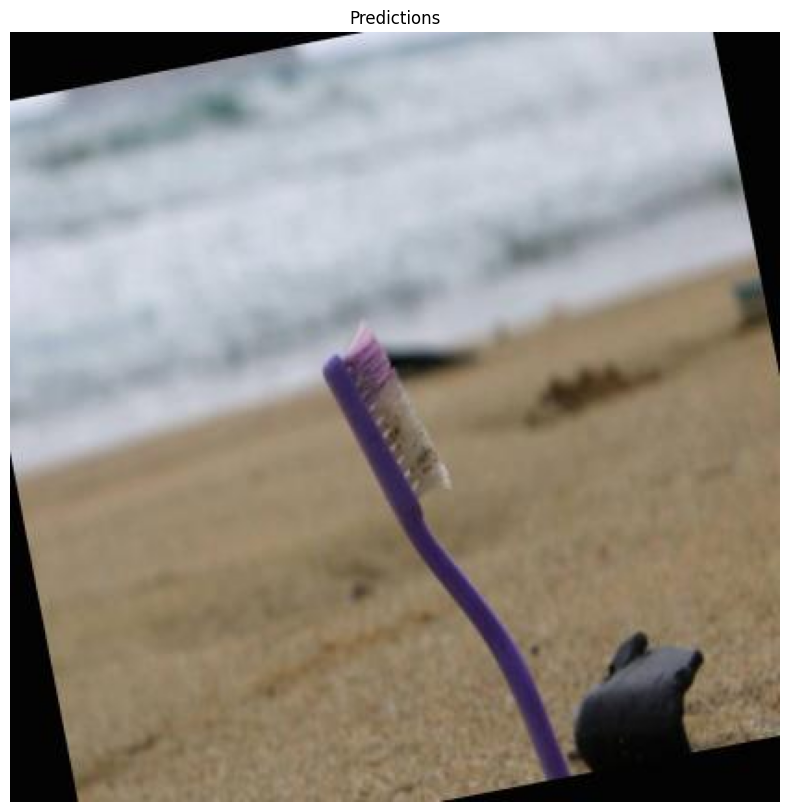

In [2]:
# Install the ultralytics library (if not already installed)
!pip install ultralytics

# Import the required libraries
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the trained YOLOv8 model
model_path = '/content/drive/MyDrive/yolo11n.pt'  # Path to your saved model
model = YOLO(model_path)

# Define the image path
image_path = '/content/drive/MyDrive/Mini_Project/labelled alamy/train/images/DeWatermark-ai_1721904050838_png.rf.58ac2070735e2764bae75241f3509561.jpg'  # Path to your image

# Make predictions on the image
results = model.predict(source=image_path)

# Display the results
for result in results:
    # Draw bounding boxes on the image
    boxes = result.boxes  # Get the predicted boxes
    img = result.orig_img  # Get the original image

    # Plot the image with bounding boxes
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying
    plt.axis('off')  # Turn off axis
    plt.title("Predictions")
    plt.show()



image 1/1 /content/drive/MyDrive/Mini_Project/Alamy photos/tins.png: 448x640 1 kite, 347.9ms
Speed: 6.7ms preprocess, 347.9ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)


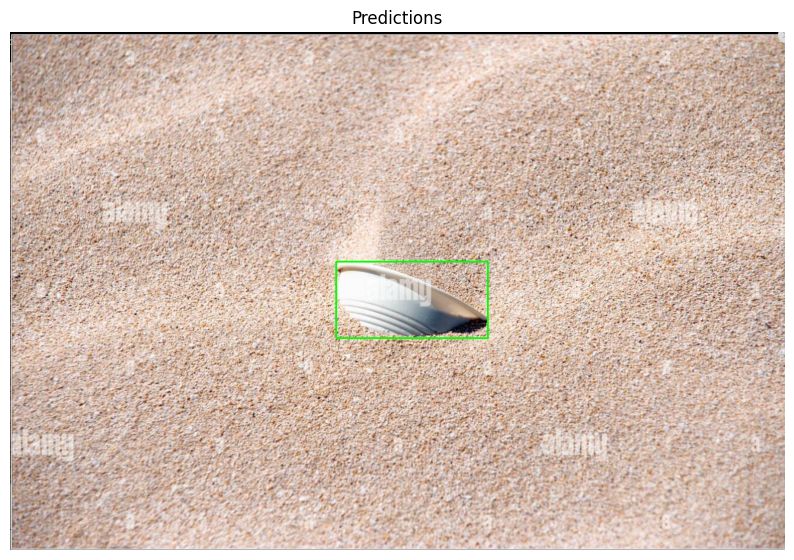

In [13]:
# Install the ultralytics library (if not already installed)
!pip install ultralytics

# Import the required libraries
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the trained YOLOv8 model
model_path = '/content/drive/MyDrive/yolo11n.pt'  # Path to your saved model
model = YOLO(model_path)

# Define the image path
image_path = '/content/drive/MyDrive/Mini_Project/Alamy photos/tins.png'  # Path to your image

# Make predictions on the image
results = model.predict(source=image_path, save=False, show=False)  # Disable saving and showing in YOLO

# Display the results
for result in results:
    # Get the original image
    img = result.orig_img

    # Draw bounding boxes on the image
    for box in result.boxes.xyxy:  # Get the predicted boxes in [x1, y1, x2, y2] format
        x1, y1, x2, y2 = map(int, box[:4])  # Convert box coordinates to integers
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw rectangle on image (green color, thickness=2)

    # Plot the image with bounding boxes
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying
    plt.axis('off')  # Turn off axis
    plt.title("Predictions")
    plt.show()


In [3]:
# Import the required libraries
import torch
import cv2
import matplotlib.pyplot as plt

# Load the trained YOLOv5 model
model_path = '/content/drive/MyDrive/my_yolo_best.pt'  # Path to your saved model
model = torch.hub.load('ultralytics/yolov5', 'custom', path=model_path)

# Define the image path
image_path = '/content/drive/MyDrive/Mini_Project/labelled alamy/train/images/DeWatermark-ai_1721904050838_png.rf.58ac2070735e2764bae75241f3509561.jpg'  # Path to your image

# Make predictions on the image
results = model(image_path)

# Display the results
# Get the original image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for displaying

# Plot the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(img)  # Display the image
plt.axis('off')  # Turn off axis
plt.title("Original Image with Predictions")

# Draw bounding boxes on the image
for box in results.xyxy[0]:  # results.xyxy[0] contains the bounding boxes
    x1, y1, x2, y2, conf, cls = box
    cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)  # Draw the box
    plt.text(int(x1), int(y1), f'{model.names[int(cls)]} {conf:.2f}', color='white', fontsize=12, backgroundcolor='blue')  # Label

plt.imshow(img)  # Show the image with predictions
plt.axis('off')  # Turn off axis
plt.title("Predictions")
plt.show()

/usr/local/lib/python3.10/dist-packages/torch/hub.py:295: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


requirements: Ultralytics requirement ['gitpython>=3.1.30'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 202.8 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 3.4s, installed 1 package: ['gitpython>=3.1.30']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 2024-10-9 Python-3.10.12 torch-2.4.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [9]:
from inference_sdk import InferenceHTTPClient

CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="IC9xWnI74gylEkUJOchX"
)
# Define the image file path
image_file = "/content/drive/MyDrive/Mini_Project/Alamy photos/pipe.png"

result = CLIENT.infer(image_file, model_id="identification-ttnz2/25")

In [10]:
result

{'inference_id': 'd1006445-125c-455a-9080-9e77e3a6aaa3',
 'time': 0.14856775599992034,
 'image': {'width': 1301, 'height': 865},
 'predictions': [{'x': 651.5,
   'y': 229.5,
   'width': 571.0,
   'height': 457.0,
   'confidence': 0.7453550696372986,
   'class': 'plastic_wrapper',
   'class_id': 9,
   'detection_id': 'acb70eda-9a99-400a-bb4b-addc38abb9d5'}]}

#Dense Pose

In [ ]:
# Install required dependencies
!pip install opencv-python torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113
!pip install git+https://github.com/facebookresearch/detectron2.git
!pip install git+https://github.com/facebookresearch/DensePose.git
!pip install mediapipe opencv-python

# Import necessary libraries
import torch
import cv2
import matplotlib.pyplot as plt
from densepose import DensePosePredictor, DensePoseDataManager


In [ ]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

# Initialize MediaPipe Pose
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# Define the image path
image_path = '/content/drive/MyDrive/Mini_Project/labelled alamy/train/images/DeWatermark-ai_1721904050838_png.rf.58ac2070735e2764bae75241f3509561.jpg'  # Path to your image

# Read the image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Process the image and make predictions
with mp_pose.Pose(static_image_mode=True) as pose:
    results = pose.process(image_rgb)

# Draw the pose annotation on the image
if results.pose_landmarks:
    mp_drawing.draw_landmarks(image_rgb, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')
plt.title("MediaPipe Pose Estimation")
plt.show()
